In [1]:
# Dependencies

import pandas as pd
import matplotlib
import json
import requests
import time
import numpy as np
import pprint
from scipy.stats import linregress
from matplotlib import pyplot as plt

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Spotify data files
data_csv_path = "Resources/data.csv"
data_by_genres_csv_path = "Resources/data_by_genres.csv"

# Read the raw spotify csv
data = pd.read_csv(data_csv_path)
data_by_genres = pd.read_csv(data_by_genres_csv_path)

# Verify data completeness and headers
data.count()
data.head(50)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.5170,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.7980,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.7070,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
5,0.996000,['Mamie Smith & Her Jazz Hounds'],0.424,198627,0.2450,0,3HnrHGLE9u2MjHtdobfWl9,0.799000,5,0.2350,-11.470,1,Crazy Blues - 78rpm Version,9,1920,0.0397,103.870,0.4770,1920
6,0.992000,['Mamie Smith'],0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.1760,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.4870,1920
7,0.996000,['Mamie Smith & Her Jazz Hounds'],0.474,186173,0.2390,0,02FzJbHtqElixxCmrpSCUa,0.186000,9,0.1950,-9.712,1,Arkansas Blues,0,1920,0.0289,78.784,0.3660,1920
8,0.996000,['Francisco Canaro'],0.469,146840,0.2380,0,02i59gYdjlhBmbbWhf8YuK,0.960000,8,0.1490,-18.717,1,La Chacarera - Remasterizado,0,1920-07-08,0.0741,130.060,0.6210,1920
9,0.006820,['Meetya'],0.571,476304,0.7530,0,06NUxS2XL3efRh0bloxkHm,0.873000,8,0.0920,-6.943,1,Broken Puppet - Original Mix,0,1920-01-01,0.0446,126.993,0.1190,1920


In [2]:
# Verify data_by_genres completeness and headers
data_by_genres.count()
data_by_genres.head(50)

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1
5,abstract,0.411262,0.473600,3.660984e+05,0.479400,0.841400,0.097160,-15.799400,0.045300,142.495400,0.274260,43.800000,5,1
6,abstract beats,0.459000,0.669000,1.748670e+05,0.735000,0.000000,0.103000,-7.264000,0.329000,117.284000,0.723000,62.000000,10,1
7,abstract hip hop,0.297353,0.725274,2.282049e+05,0.726844,0.099187,0.268938,-7.257105,0.224437,107.588773,0.639051,21.050866,1,1
8,abstract idm,0.995000,0.174000,5.805330e+05,0.002910,0.931000,0.098300,-37.518000,0.039900,67.560000,0.032800,46.000000,0,1
9,accordeon,0.598750,0.442000,1.654800e+05,0.314000,0.607000,0.191675,-12.174250,0.042475,139.819500,0.511500,35.250000,2,1


In [3]:
# Clean data
clean_data = data.drop_duplicates(subset=['id','name'], keep=False)
clean_data.head(50)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.5170,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.7980,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.7070,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
5,0.996000,['Mamie Smith & Her Jazz Hounds'],0.424,198627,0.2450,0,3HnrHGLE9u2MjHtdobfWl9,0.799000,5,0.2350,-11.470,1,Crazy Blues - 78rpm Version,9,1920,0.0397,103.870,0.4770,1920
6,0.992000,['Mamie Smith'],0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.1760,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.4870,1920
7,0.996000,['Mamie Smith & Her Jazz Hounds'],0.474,186173,0.2390,0,02FzJbHtqElixxCmrpSCUa,0.186000,9,0.1950,-9.712,1,Arkansas Blues,0,1920,0.0289,78.784,0.3660,1920
8,0.996000,['Francisco Canaro'],0.469,146840,0.2380,0,02i59gYdjlhBmbbWhf8YuK,0.960000,8,0.1490,-18.717,1,La Chacarera - Remasterizado,0,1920-07-08,0.0741,130.060,0.6210,1920
9,0.006820,['Meetya'],0.571,476304,0.7530,0,06NUxS2XL3efRh0bloxkHm,0.873000,8,0.0920,-6.943,1,Broken Puppet - Original Mix,0,1920-01-01,0.0446,126.993,0.1190,1920


In [4]:
# Filter by year and count of songs by year
filter_2019 = clean_data.loc[clean_data['year'] == 2019]
length_2019 = len(filter_2019)
print(length_2019)

filter_2020 = clean_data.loc[clean_data['year'] == 2020]
length_2020 = len(filter_2020)
print(length_2020)

filter_2021 = clean_data.loc[clean_data['year'] == 2021]
length_2021 = len(filter_2021)
print(length_2021)


2159
3124
988


In [17]:
summary_key_2019 = filter_2019.groupby('key')

# Calculate the mean, standard deviation by year for popularity of key
key_mean_2019 = round(summary_key_2019['popularity'].mean(),2)
key_stdev_2019 = round(summary_key_2019['popularity'].std(),2)

# Create DataFrame to summarize calculations
summary_key_mean_2019 = pd.DataFrame({'Mean': key_mean_2019,
                                   'Standard Deviation': key_stdev_2019})
summary_key_mean_2019['year'] = ('2019')

summary_key_mean_2019.head(20)

,Mean,Standard Deviation,year
key,,,
0,38.36,32.37,2019
1,37.51,32.84,2019
2,31.35,32.04,2019
3,35.36,33.86,2019
4,31.15,31.48,2019
5,37.51,32.71,2019
6,39.49,32.47,2019
7,32.56,31.47,2019
8,41.43,33.37,2019


In [18]:
summary_key_2020 = filter_2020.groupby('key')

# Calculate the mean, standard deviation by year for popularity of key
key_mean_2020 = round(summary_key_2020['popularity'].mean(),2)
key_stdev_2020 = round(summary_key_2020['popularity'].std(),2)

# Create DataFrame to summarize calculations
summary_key_mean_2020 = pd.DataFrame({'Mean': key_mean_2020,
                                   'Standard Deviation': key_stdev_2020,})

summary_key_mean_2020['year'] = ('2020')

summary_key_mean_2020.head(20)

,Mean,Standard Deviation,year
key,,,
0,29.24,32.22,2020
1,38.98,32.67,2020
2,25.78,31.48,2020
3,25.32,30.73,2020
4,31.78,34.69,2020
5,32.50,33.24,2020
6,35.93,32.64,2020
7,25.91,29.47,2020
8,33.43,33.83,2020


In [19]:
summary_key_2021 = filter_2021.groupby('key')

# Calculate the mean, standard deviation by year for popularity of key
key_mean_2021 = round(summary_key_2021['popularity'].mean(),2)
key_stdev_2021 = round(summary_key_2021['popularity'].std(),2)

# Create DataFrame to summarize calculations
summary_key_mean_2021 = pd.DataFrame({'Mean': key_mean_2021,
                                   'Standard Deviation': key_stdev_2021})

summary_key_mean_2021['year'] = ('2021')

summary_key_mean_2021.head(20)

,Mean,Standard Deviation,year
key,,,
0,9.49,22.59,2021
1,10.08,23.12,2021
2,16.60,27.93,2021
3,11.65,23.97,2021
4,12.77,25.52,2021
5,9.05,20.44,2021
6,15.88,27.10,2021
7,13.46,25.32,2021
8,14.73,24.61,2021


In [20]:
# Concat years for key average popularities

merge_key_all = pd.concat([summary_key_mean_2019, 
                            summary_key_mean_2020,
                            summary_key_mean_2021])

merge_key_all

,Mean,Standard Deviation,year
key,,,
0,38.36,32.37,2019
1,37.51,32.84,2019
2,31.35,32.04,2019
3,35.36,33.86,2019
4,31.15,31.48,2019
5,37.51,32.71,2019
6,39.49,32.47,2019
7,32.56,31.47,2019
8,41.43,33.37,2019


In [21]:
# Legend of keys by number

key_scale = pd.DataFrame({"key": [0,1,2,3,4,5,6,7,8,9,10,11], 
                          "scale": ["C", "C#/Db", "D", "D#/Eb", "E", "F", 
                                    "F#/Gb", "G", "G#/Ab", "A", "A#/Bb", "B"]})
print(key_scale)

    key  scale
0     0      C
1     1  C#/Db
2     2      D
3     3  D#/Eb
4     4      E
5     5      F
6     6  F#/Gb
7     7      G
8     8  G#/Ab
9     9      A
10   10  A#/Bb
11   11      B


In [22]:
# Combine key legend in merged key data set
merge_key_all_scale = pd.merge(merge_key_all, key_scale, 
                               left_on="key", right_on="key", how="inner")

merge_key_all_scale

,key,Mean,Standard Deviation,year,scale
0,0,38.36,32.37,2019,C
1,0,29.24,32.22,2020,C
2,0,9.49,22.59,2021,C
3,1,37.51,32.84,2019,C#/Db
4,1,38.98,32.67,2020,C#/Db
5,1,10.08,23.12,2021,C#/Db
6,2,31.35,32.04,2019,D
7,2,25.78,31.48,2020,D
8,2,16.60,27.93,2021,D
9,3,35.36,33.86,2019,D#/Eb


In [23]:
# max by year using merge_key_all_scale

max_key_year = pd.DataFrame(merge_key_all_scale.groupby('year')['Mean'].max().sort_values()).reset_index()

max_key_year

merge_max_key = pd.merge(merge_key_all_scale, max_key_year, 
                               left_on="Mean", right_on="Mean", how="inner")

del merge_max_key['year_x']
del merge_max_key['Standard Deviation']
del merge_max_key['key']

merge_max_key.sort_values(by=['year_y'], inplace=True)
merge_max_key

#  reorder columns
merge_max_key = merge_max_key[['year_y','scale','Mean']]
merge_max_key

# merge_max_key.reset_index('year_y')


,year_y,scale,Mean
2,2019,G#/Ab,41.43
0,2020,C#/Db,38.98
1,2021,D,16.60


In [53]:
merge_max_key["combined"]=merge_max_key["year_y"]+"-"+merge_max_key["scale"]
merge_max_key.head()

,year_y,scale,Mean,combined
2,2019,G#/Ab,41.43,2019-G#/Ab
0,2020,C#/Db,38.98,2020-C#/Db
1,2021,D,16.60,2021-D


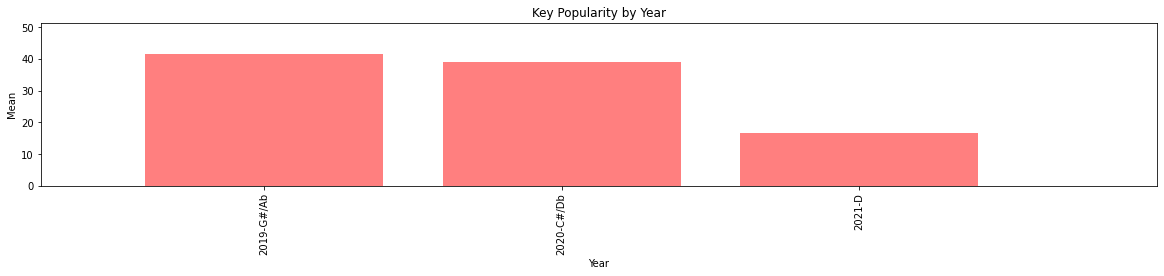

In [124]:
# Most popular key by year graph 
#plot_pandas = merge_max_key.plot.bar(figsize=(15,10), color='b',fontsize =14)
#merge_max_key
#plt.xlabel("year",fontsize = 14)
#plt.ylabel("Mean",fontsize = 14)
#plt.title("Key Popularity",fontsize = 20)
#plt.savefig("../key_by_year.png", bbox_inches = "tight")
#plt.tight_layout()
#plt.show()
#merge_max_key
x_axis = np.arange(len(merge_max_key))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, merge_max_key["Mean"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, merge_max_key["combined"], rotation="vertical")

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(merge_max_key["Mean"])+10)

plt.title("Key Popularity by Year")
plt.xlabel("Year")
plt.ylabel("Mean")
plt.savefig("key_pop_year.png")


In [56]:
# Mode evaluation 2019

summary_mode_2019 = filter_2019.groupby('mode')

# Calculate the mean, standard deviation by year for popularity of mode
mode_mean_2019 = round(summary_mode_2019['popularity'].mean(),2)
mode_stdev_2019 = round(summary_mode_2019['popularity'].std(),2)

# Create DataFrame to summarize calculations
summary_mode_mean_2019 = pd.DataFrame({'Mean': mode_mean_2019,
                                   'Standard Deviation': mode_stdev_2019})

summary_mode_mean_2019["year"] = "2019"

summary_mode_mean_2019.head(20)

,Mean,Standard Deviation,year
mode,,,
0,33.07,32.88,2019
1,35.56,32.38,2019


In [57]:
# mode evaluation 2020

summary_mode_2020 = filter_2020.groupby('mode')

# Calculate the mean, standard deviation by year for popularity of mode
mode_mean_2020 = round(summary_mode_2020['popularity'].mean(),2)
mode_stdev_2020 = round(summary_mode_2020['popularity'].std(),2)

# Create DataFrame to summarize calculations
summary_mode_mean_2020 = pd.DataFrame({'Mean': mode_mean_2020,
                                   'Standard Deviation': mode_stdev_2020})

summary_mode_mean_2020["year"] = "2020"

summary_mode_mean_2020.head(20)

,Mean,Standard Deviation,year
mode,,,
0,32.01,32.79,2020
1,29.93,32.20,2020


In [58]:
# mode evaluation 2021

summary_mode_2021 = filter_2021.groupby('mode')

# Calculate the mean, standard deviation by year for popularity of mode
mode_mean_2021 = round(summary_mode_2021['popularity'].mean(),2)
mode_stdev_2021 = round(summary_mode_2021['popularity'].std(),2)

# Create DataFrame to summarize calculations
summary_mode_mean_2021 = pd.DataFrame({'Mean': mode_mean_2021,
                                   'Standard Deviation': mode_stdev_2021})

summary_mode_mean_2021["year"] = "2021"

summary_mode_mean_2021.head(20)

,Mean,Standard Deviation,year
mode,,,
0,6.89,18.96,2021
1,15.56,26.70,2021


In [59]:
# Concat years for key average popularities

merge_mode_all = pd.concat([summary_mode_mean_2019, 
                            summary_mode_mean_2020,
                            summary_mode_mean_2021])

merge_mode_all

,Mean,Standard Deviation,year
mode,,,
0,33.07,32.88,2019
1,35.56,32.38,2019
0,32.01,32.79,2020
1,29.93,32.20,2020
0,6.89,18.96,2021
1,15.56,26.70,2021


In [116]:
mode_scale = pd.DataFrame({"mode": [0,1], 
                          "major_minor": ["minor", "major"]})
print(mode_scale)

   mode major_minor
0     0       minor
1     1       major


In [117]:
merge_mode_all_scale = pd.merge(merge_mode_all, mode_scale, 
                               left_on="mode", right_on="mode", how="inner")
merge_mode_all_scale

,mode,Mean,Standard Deviation,year,major_minor
0,0,33.07,32.88,2019,minor
1,0,32.01,32.79,2020,minor
2,0,6.89,18.96,2021,minor
3,1,35.56,32.38,2019,major
4,1,29.93,32.20,2020,major
5,1,15.56,26.70,2021,major


In [118]:
max_mode_year = pd.DataFrame(merge_mode_all_scale.groupby('year')['Mean'].max().sort_values()).reset_index()

max_mode_year

merge_max_mode = pd.merge(merge_mode_all_scale, max_mode_year, 
                               left_on="Mean", right_on="Mean", how="inner")
merge_max_mode

del merge_max_mode['year_x']
del merge_max_mode['Standard Deviation']
#del merge_max_mode['key']

merge_max_mode.sort_values(by=['year_y'], inplace=True)
merge_max_mode

#  reorder columns
merge_max_mode= merge_max_mode[['year_y','mode','Mean','major_minor']]
merge_max_mode


,year_y,mode,Mean,major_minor
1,2019,1,35.56,major
0,2020,0,32.01,minor
2,2021,1,15.56,major


In [119]:
merge_max_mode["combined"]=merge_max_mode["year_y"]+"-"+merge_max_mode["major_minor"]
merge_max_mode.head()

,year_y,mode,Mean,major_minor,combined
1,2019,1,35.56,major,2019-major
0,2020,0,32.01,minor,2020-minor
2,2021,1,15.56,major,2021-major


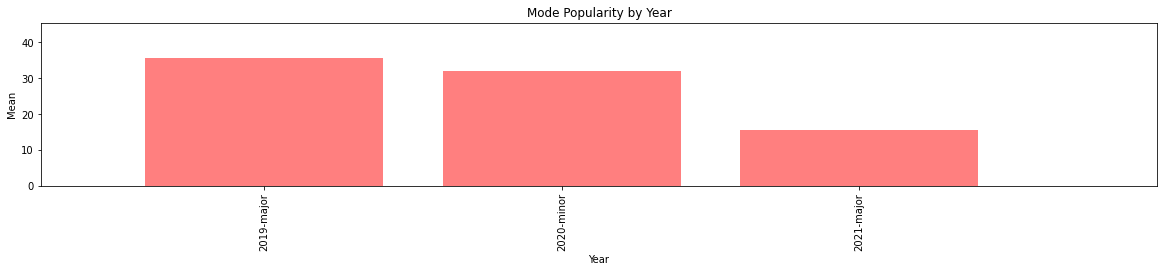

In [125]:

x_axis = np.arange(len(merge_max_mode))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, merge_max_mode["Mean"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, merge_max_mode["combined"], rotation="vertical")

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(merge_mode_all_scale["Mean"])+10)

plt.title("Mode Popularity by Year")
plt.xlabel("Year")
plt.ylabel("Mean")
plt.savefig("mode_pop_year.png")

R squared: 0.0074475911145760855


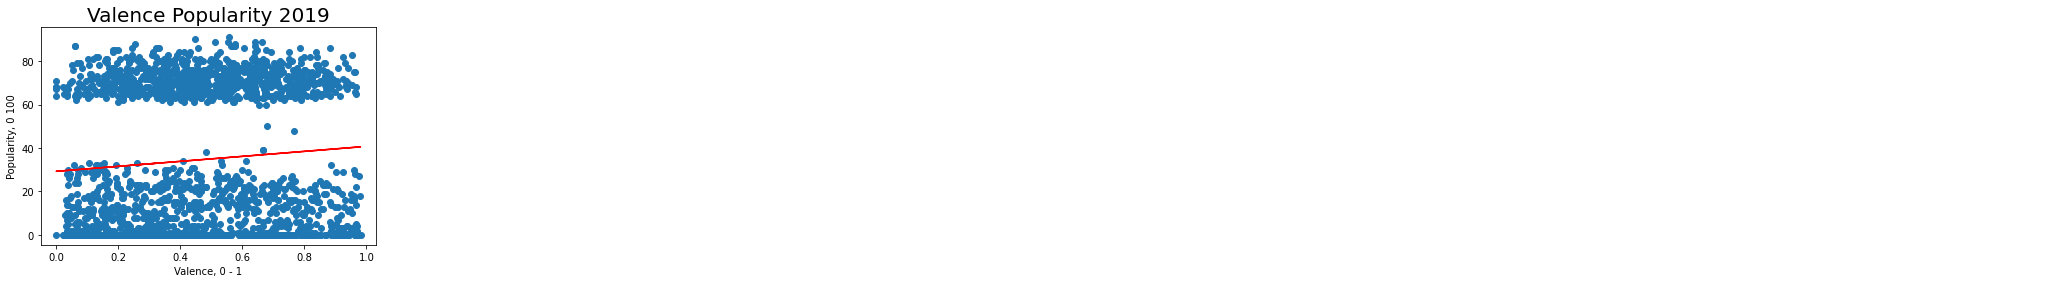

In [127]:
# 2019 Correlation of valence to popularity

## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values_2019 = filter_2019['valence'].astype('float')
y_values_2019 = filter_2019['popularity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_2019, y_values_2019)
regress_values_2019 = x_values_2019 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values_2019,y_values_2019)

# Plot regression line
plt.plot(x_values_2019,regress_values_2019,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")

# Label plot
plt.xlabel('Valence, 0 - 1')
plt.ylabel('Popularity, 0 100')
plt.title("Valence Popularity 2019",fontsize = 20)
plt.savefig("valence_pop_2019.png")
# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.010000386994581837


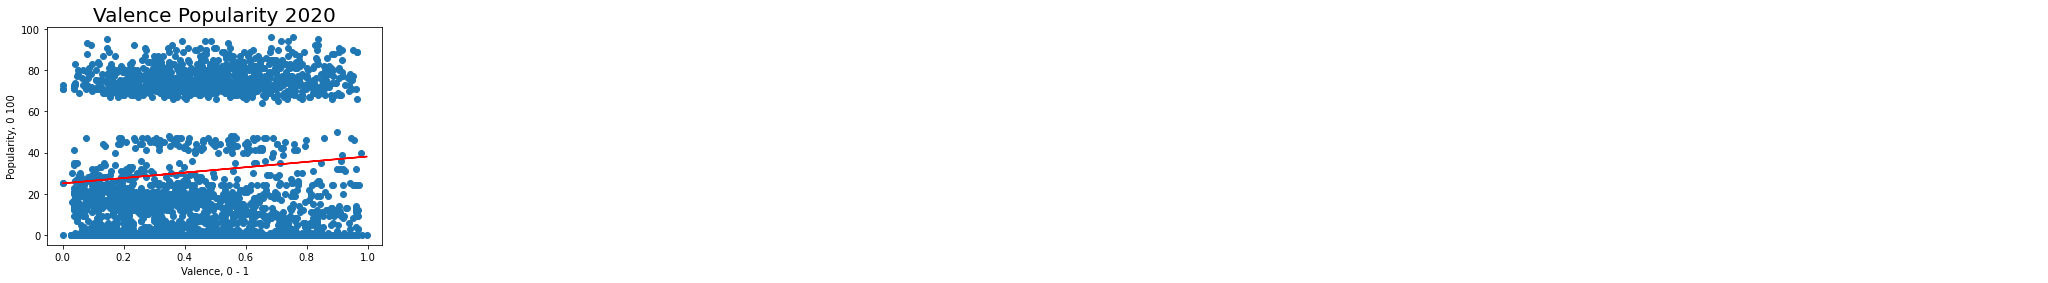

In [128]:
# 2020 Correlation of valence to popularity

## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values_2020 = filter_2020['valence'].astype('float')
y_values_2020 = filter_2020['popularity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_2020, y_values_2020)
regress_values_2020 = x_values_2020 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values_2020,y_values_2020)

# Plot regression line
plt.plot(x_values_2020,regress_values_2020,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")

# Label plot
plt.xlabel('Valence, 0 - 1')
plt.ylabel('Popularity, 0 100')
plt.title("Valence Popularity 2020",fontsize = 20)
plt.savefig("valence_pop_2020.png")
# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.008835067789281817


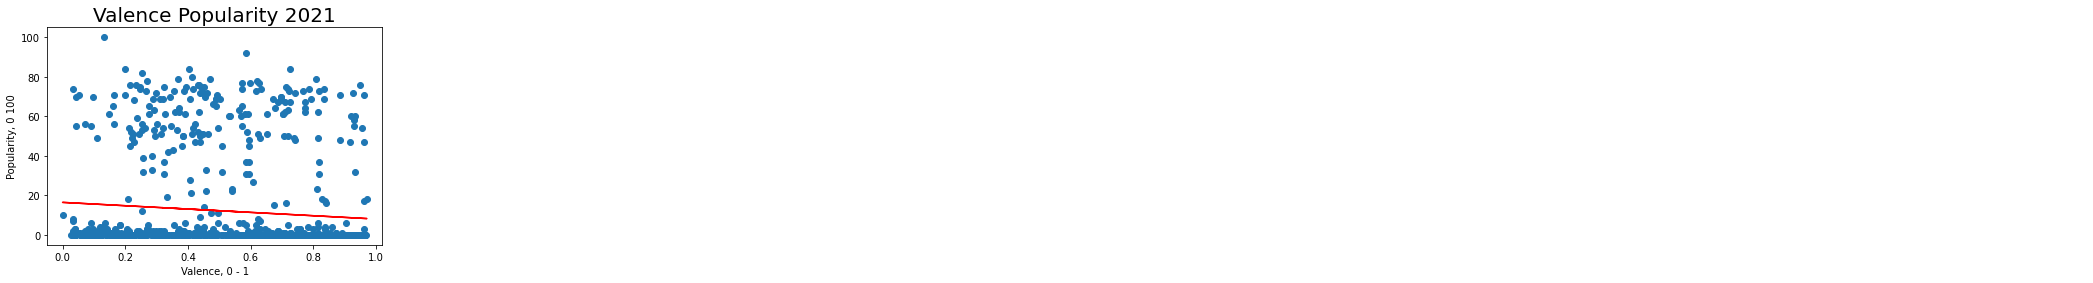

In [129]:
# 2021 Correlation of valence to popularity

## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values_2021 = filter_2021['valence'].astype('float')
y_values_2021 = filter_2021['popularity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_2021, y_values_2021)
regress_values_2021 = x_values_2021 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values_2021,y_values_2021)

# Plot regression line
plt.plot(x_values_2021,regress_values_2021,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")

# Label plot
plt.xlabel('Valence, 0 - 1')
plt.ylabel('Popularity, 0 100')
plt.title("Valence Popularity 2021",fontsize = 20)
plt.savefig("valence_pop_2021.png")
# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [123]:
birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id =SPOTIPY_CLIENT_ID, client_secret = SPOTIPY_CLIENT_SECRET ))
results = spotify.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
   results = spotify.next(results)
   albums.extend(results['items'])
for album in albums:
   print(album['name'])

Beautiful Lies
Beautiful Lies
Beautiful Lies (Deluxe)
Beautiful Lies (Deluxe)
Fire Within
Fire Within
Fire Within (Deluxe)
Fire Within (Deluxe)
Fire Within (Deluxe)
Live in London
Birdy
Birdy
Birdy
Birdy
Birdy (Deluxe Version)


In [12]:
# Download Spotify Data CSV
